In [220]:
# Import necessary libraries
import numpy as np
import cv2
from skimage.util import random_noise
import matplotlib.pyplot as plt

In [221]:
# Function to display images with a maximum of 3 images per row
def display_images(images, titles, figsize=(15, 5), max_per_row=3):
    num_images = len(images)
    num_rows = (num_images + max_per_row - 1) // max_per_row  # Calculate required rows
    plt.figure(figsize=figsize)
    
    for i in range(num_images):
        plt.subplot(num_rows, max_per_row, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


In [222]:
# Load an image in grayscale
image = cv2.imread('rabbit2.jpg', cv2.IMREAD_GRAYSCALE)

In [223]:
# Add salt and pepper noise to the image
noisy_image = random_noise(image, mode='s&p', amount=0.05)  # 'amount' controls the density of noise
noisy_image = np.array(255 * noisy_image, dtype='uint8')  # Convert to 8-bit image format

In [224]:
# # Add Gaussian noise to the image
# noisy_image = random_noise(image, mode='gaussian')
# noisy_image = np.array(255 * noisy_image, dtype='uint8')  # Convert to 8-bit image format

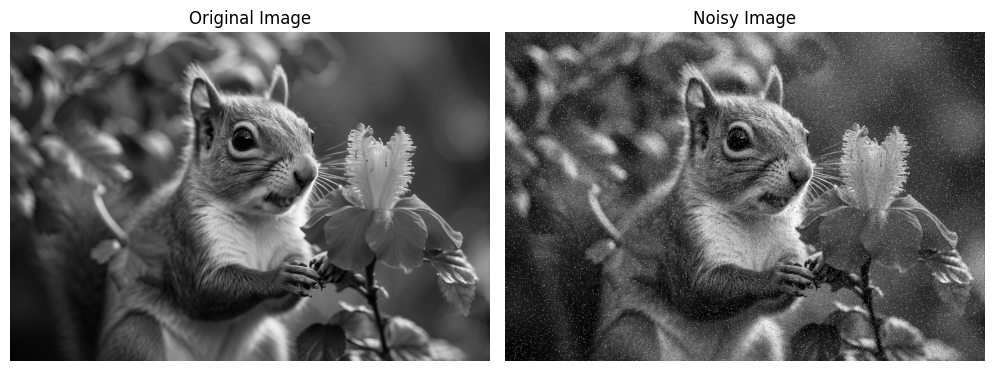

In [225]:
# Display original and noisy images
display_images([image, noisy_image], ['Original Image', 'Noisy Image'])

In [226]:
# Define kernel size
kernel_size = 5  # Change this to any odd integer (3, 5, 7, ...)

In [227]:
# Apply Gaussian filter with dynamic kernel size
gaussian_filtered = cv2.GaussianBlur(noisy_image, (kernel_size, kernel_size), sigmaX=1.0)

In [228]:
# Arithmetic Mean Filter with dynamic kernel size
def arithmetic_mean_filter(img, ksize):
    kernel = np.ones((ksize, ksize), np.float32) / (ksize * ksize)
    return cv2.filter2D(img, -1, kernel)

arithmetic_mean_filtered = arithmetic_mean_filter(noisy_image, kernel_size)

In [229]:
# Geometric Mean Filter with dynamic kernel size
def geometric_mean_filter(img, ksize):
    # Create an empty output image
    output = np.zeros_like(img, dtype=np.float32)

    # Get the kernel size
    pad = ksize // 2

    # Pad the image to handle borders
    padded_img = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REFLECT)

    # Apply the geometric mean filter
    for i in range(pad, padded_img.shape[0] - pad):
        for j in range(pad, padded_img.shape[1] - pad):
            # Get the neighborhood of the pixel
            neighborhood = padded_img[i - pad:i + pad + 1, j - pad:j + pad + 1]
            
            # Compute the geometric mean of the neighborhood
            geom_mean = np.exp(np.mean(np.log(neighborhood + 1e-8)))  # Adding small epsilon to avoid log(0)
            
            # Assign the computed geometric mean to the output image
            output[i - pad, j - pad] = geom_mean

    # Convert back to the original image format (uint8)
    return np.clip(output, 0, 255).astype(np.uint8)

# Example usage
geometric_mean_filtered = geometric_mean_filter(noisy_image, kernel_size)

In [230]:
# Harmonic Mean Filter with dynamic kernel size
def harmonic_mean_filter(img, ksize):
    m, n = img.shape
    pad = ksize // 2
    output = np.zeros((m, n), dtype='float32')
    padded_img = np.pad(img, ((pad, pad), (pad, pad)), 'constant', constant_values=1)  # Padding for edges

    for i in range(pad, m + pad):
        for j in range(pad, n + pad):
            region = padded_img[i - pad:i + pad + 1, j - pad:j + pad + 1]
            harmonic_mean = (ksize * ksize) / np.sum(1.0 / (region + 1e-5))  # Small value to avoid division by zero
            output[i - pad, j - pad] = harmonic_mean

    return np.array(output, dtype='uint8')

harmonic_mean_filtered = harmonic_mean_filter(noisy_image, kernel_size)


In [233]:
# Contraharmonic Mean Filter with dynamic kernel size
def contraharmonic_mean_filter(img, ksize, Q):
    m, n = img.shape
    pad = ksize // 2
    output = np.zeros((m, n), dtype='float32')
    padded_img = np.pad(img, ((pad, pad), (pad, pad)), 'constant', constant_values=0)  # Padding for edges

    for i in range(pad, m + pad):
        for j in range(pad, n + pad):
            region = padded_img[i - pad:i + pad + 1, j - pad:j + pad + 1]
            numerator = np.sum(region ** (Q + 1))
            denominator = np.sum(region ** Q + 1e-5)  # Small value to avoid division by zero
            output[i - pad, j - pad] = numerator / denominator

    return np.clip(output, 0, 255).astype('uint8')

# Apply the Contraharmonic Mean Filter
Q = 1.5  # Example value, adjust based on noise type
contraharmonic_filtered = contraharmonic_mean_filter(noisy_image, kernel_size, Q)

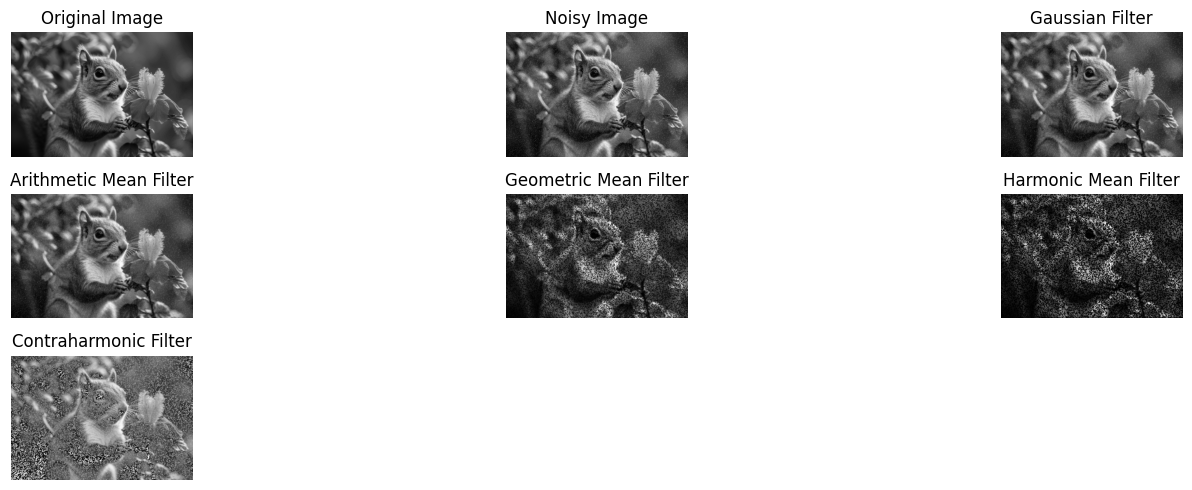

In [234]:
# Display results
display_images(
    [image, noisy_image, gaussian_filtered, arithmetic_mean_filtered, geometric_mean_filtered, harmonic_mean_filtered, contraharmonic_filtered],
    ['Original Image', 'Noisy Image', 'Gaussian Filter', 'Arithmetic Mean Filter', 'Geometric Mean Filter', 'Harmonic Mean Filter', 'Contraharmonic Filter']
)